<a href="https://colab.research.google.com/github/priyankajuttu/Projects_and_Labs/blob/main/STP_AIML_Module_6_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing forward propagation and back propagation

In this lab, we implement forward and backpropagation to train an neural network from scratch for a simple binary classification problem using gradient descent. We also see how the network's training process looks like using both synthetic and real-world data from scikit-learn, including visualizations of performance and loss curves.

### Introduction to Neural Networks

Neural Networks are a subset of machine learning, inspired by the structure and function of the human brain. They are designed to recognize patterns and relationships in data through a process of learning, making them highly effective for tasks such as image recognition, natural language processing, and predictive analytics.

At their core, neural networks consist of interconnected layers of artificial neurons (nodes). These layers typically include:

*   **Input Layer:** Receives the initial data.
*   **Hidden Layers:** Perform computations and transformations on the input data. A network can have one or many hidden layers, making it a 'deep' neural network.
*   **Output Layer:** Produces the final result of the network's processing, such as a classification label or a predicted value.

Each connection between neurons has an associated **weight**, and each neuron has a **bias**. During the learning process, these weights and biases are adjusted to minimize the difference between the network's predictions and the actual target values, allowing the network to learn complex patterns and make accurate predictions.

### Forward Propagation

Forward propagation, also known as the forward pass, is the process by which a neural network takes raw input data and processes it through its layers to generate an output. This is the 'prediction' phase of the network.

The core operations involved in forward propagation for a single neuron or layer are:

1.  **Linear Transformation:** Each neuron receives inputs from the previous layer (or the input data itself). These inputs are multiplied by their respective weights, and a bias term is added. Mathematically, this can be represented as:
    $$ Z = WX + b $$
    Where:
    *   $Z$ is the weighted sum of inputs (or 'pre-activation').
    *   $W$ represents the weights connecting the previous layer to the current neuron.
    *   $X$ represents the inputs from the previous layer.
    *   $b$ is the bias term for the current neuron.

2.  **Activation Function:** The result of the linear transformation ($Z$) is then passed through an activation function (e.g., ReLU, Sigmoid, Tanh, Softmax). This non-linear function introduces non-linearity into the network, allowing it to learn complex patterns and make more sophisticated decisions than a simple linear model. The output of the activation function is the output of the current neuron or layer:
    $$ A = \text{Activation}(Z) $$

This output $A$ then serves as the input for the next layer in the network. This process continues layer by layer until the data reaches the output layer, producing the network's final prediction.

The goal of forward propagation is simply to calculate the output of the neural network given a set of inputs and current weights and biases.

### Backward Propagation

Backward propagation, commonly known as backpropagation, is the algorithm used to train neural networks. Its primary purpose is to adjust the weights and biases of the network to minimize the difference between the network's predictions and the actual target values. This optimization process makes the network learn from its errors.

Backpropagation works by calculating the gradient of the loss function with respect to each weight and bias in the network. These gradients indicate how much each parameter contributes to the error. The process involves two main steps:

1.  **Calculate the Loss and Error:** After forward propagation computes an output, this output is compared to the true label using a **loss function** (e.g., Mean Squared Error for regression, Cross-Entropy for classification). The result is a scalar value representing the error.

2.  **Propagate the Error Backward:** The error is then propagated backward through the network, from the output layer to the input layer. This is where the **chain rule of calculus** is critically applied. The chain rule allows us to calculate how much each weight and bias in each layer contributes to the total error by computing partial derivatives. Specifically, for each parameter (weight or bias), we calculate $\frac{\partial L}{\partial W}$ and $\frac{\partial L}{\partial b}$, where $L$ is the loss function.

    *   **Output Layer:** The gradients are calculated directly using the loss function and the activation function of the output layer.
    *   **Hidden Layers:** The gradients for hidden layers are calculated iteratively, propagating the error signal from the subsequent layer backward. This means the gradient for a weight in a given layer depends on the gradients of the weights in the layers after it.

Once all gradients are computed, an optimization algorithm (e.g., Gradient Descent, Adam) uses these gradients to update the weights and biases, moving them in the direction that reduces the loss. This iterative process of forward propagation (prediction), calculating loss, and backward propagation (updating parameters) is how a neural network learns.



# What we need for gradient descent
- Consider a simple MLP
    - Let us ignore non-linearities for now to keep it simpler, but it's just a tiny change subsequently
    - Given a linear transformation on our input (for simplicity instead of an affine transformation that includes a bias): $\hat y = \theta x$
        - $\theta$ is our parameters
        - $x$ is our input
        - $\hat y$ is our prediction
    - Then we have our MSE loss function $L = \frac{1}{2} (\hat y - y)^2$
- We need to calculate our partial derivatives of our loss w.r.t. our parameters to update our parameters: $\nabla_{\theta} = \frac{\delta L}{\delta \theta}$
    - With chain rule we have $\frac{\delta L}{\delta \theta} = \frac{\delta L}{\delta \hat y} \frac{\delta \hat y}{\delta \theta}$
        - $\frac{\delta L}{\delta \hat y} = (\hat y -  y)$
        - $\frac{\delta \hat y}{\delta \theta}$ is our partial derivatives of $y$ w.r.t. our parameters (our gradient)
        


# Forward and Backprop, illustrated diagramatically

- Let us assume the following MLP architecture (Note: no bias used here for simplicity)
    - MLP architecture
        1. Linear function: hidden size = 32
        2. Non-linear function: sigmoid
        3. Linear function: output size = 1
        4. Non-linear function: sigmoid
    - We will be going through a binary classification problem classifying 2 types of flowers
        - Output size: 1 (represented by 0 or 1 depending on the flower)
        - Input size: 2 (features of the flower)


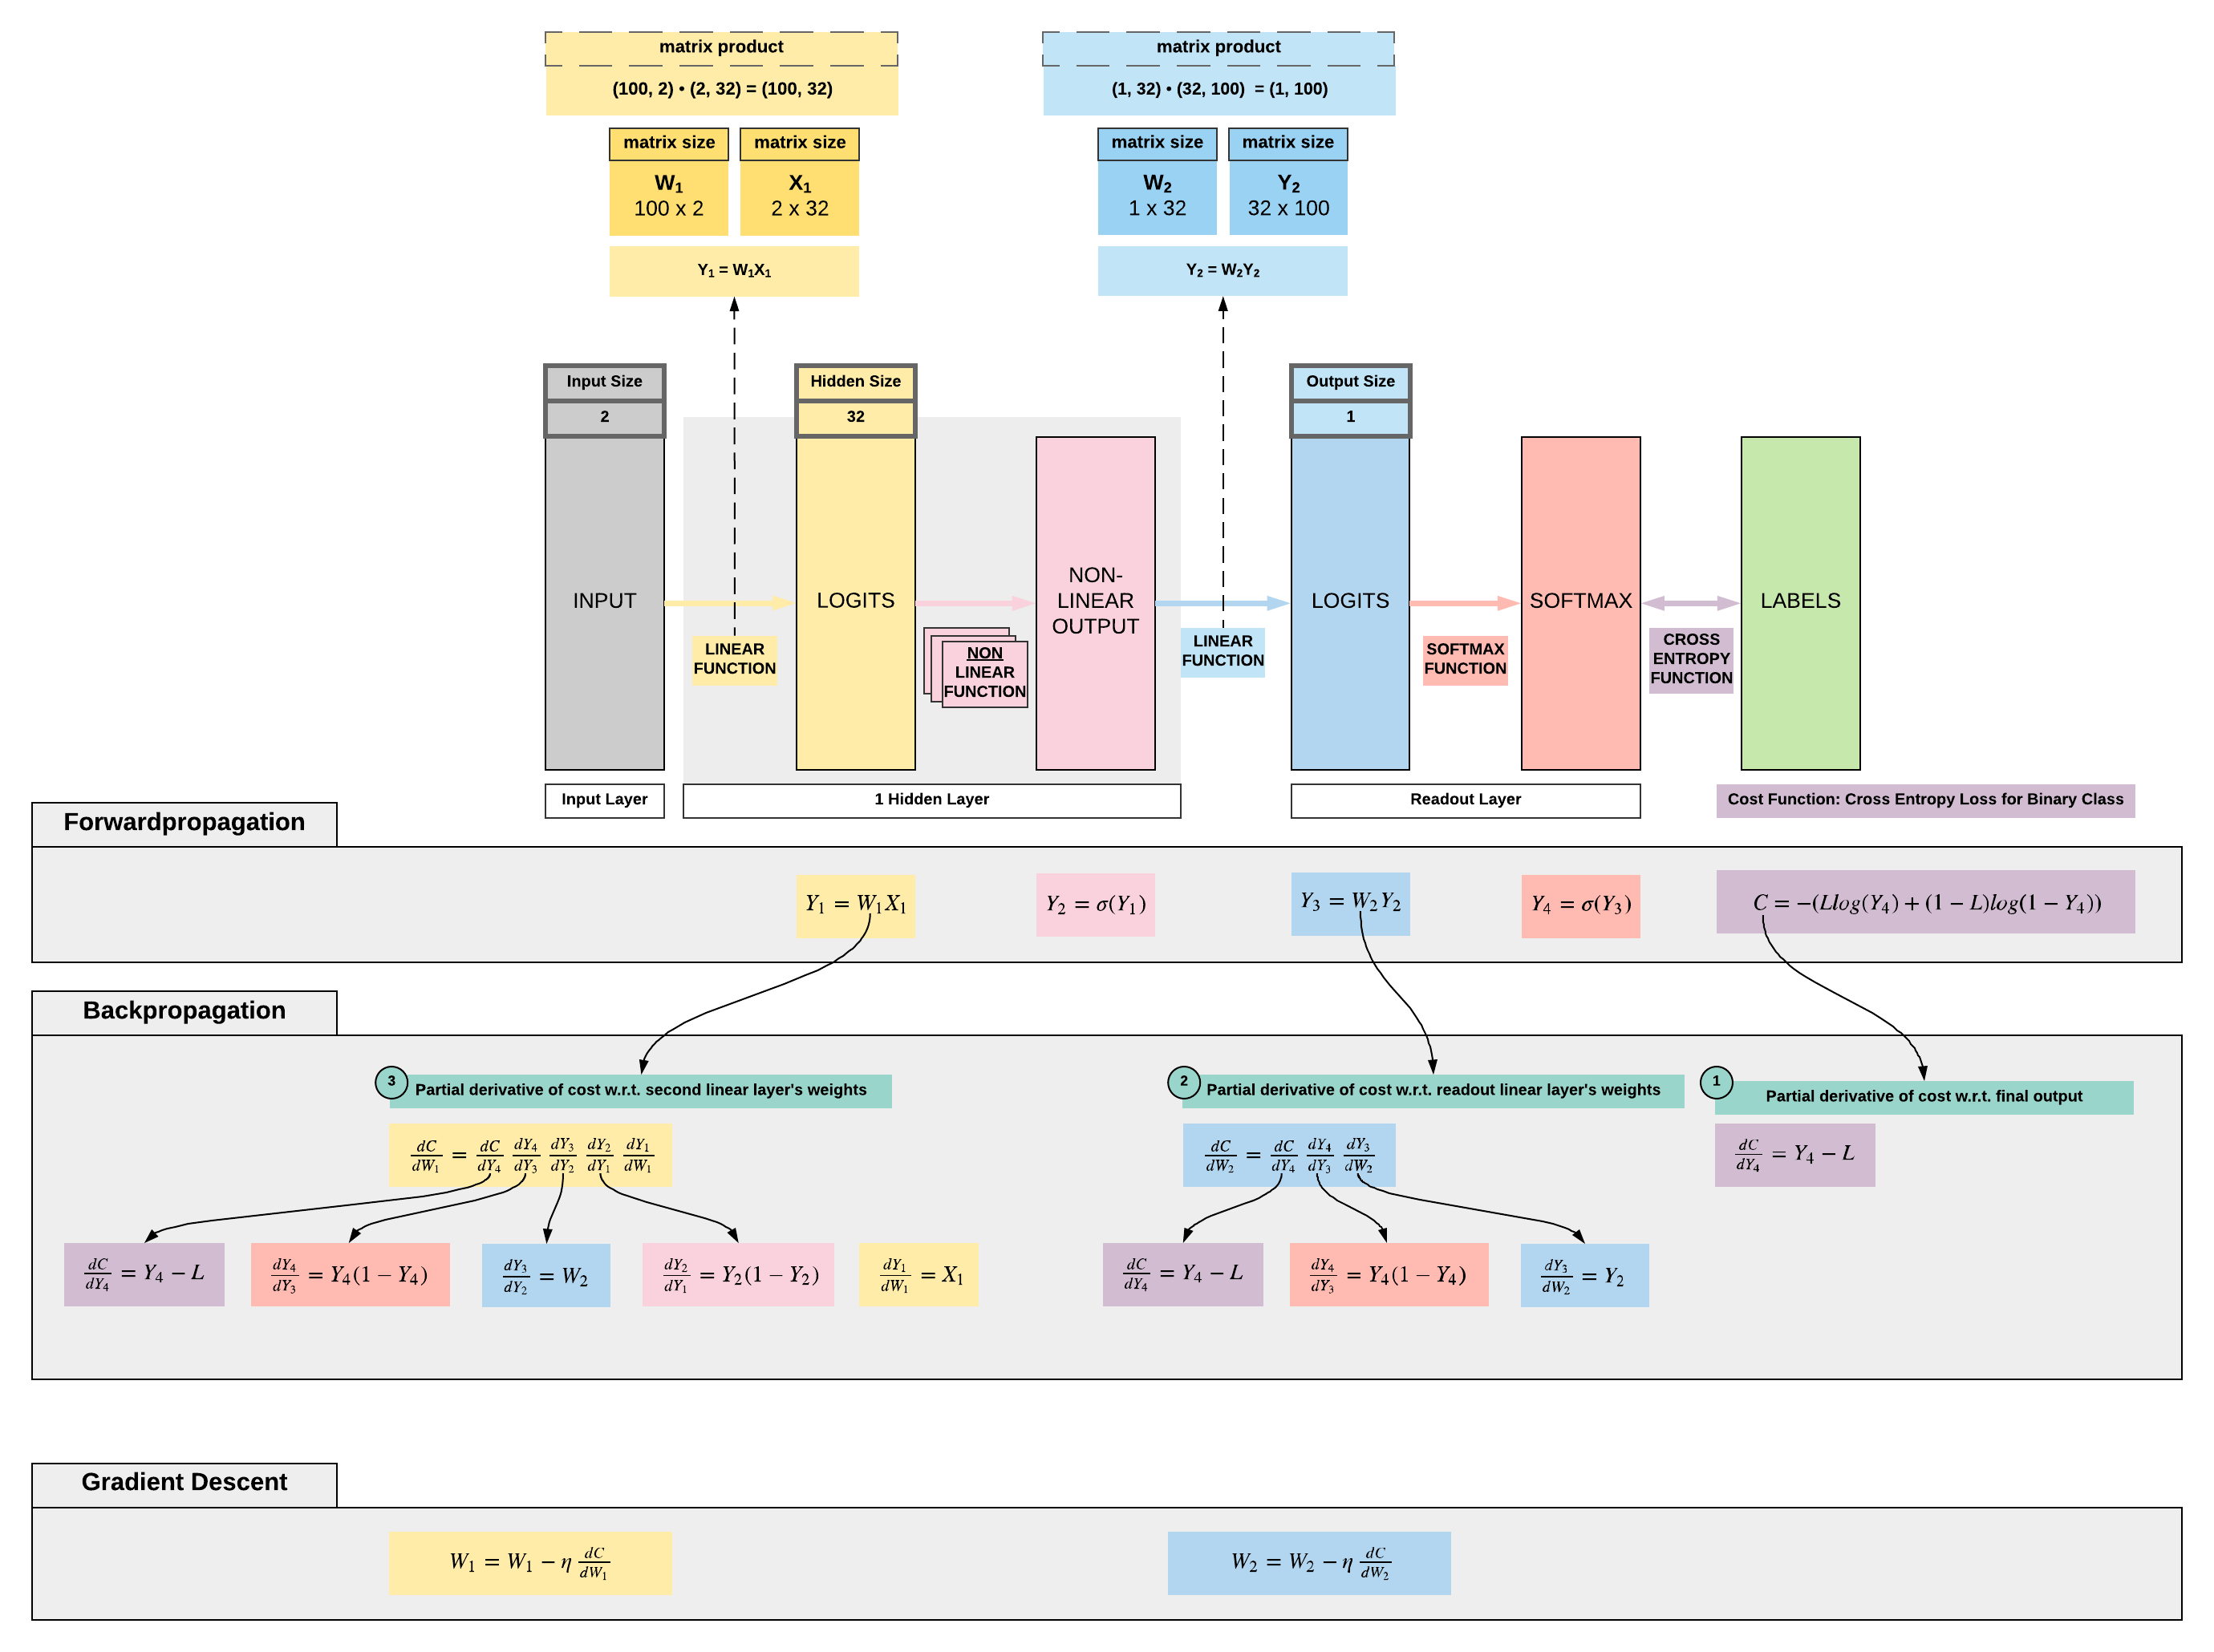

# Importing Necessary Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Example dataset generation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Forward Propagation

### Mathematical Equations for Forward Pass

As previously introduced, the forward pass involves two primary steps: a linear transformation and the application of an activation function. Let's delve deeper into the mathematical representation and the tensor shapes involved.

#### 1. Linear Transformation

The linear transformation combines the inputs from the previous layer with learnable weights and biases to produce a 'pre-activation' value. For a single layer, this is represented as:

$$ Z = WX + b $$

Where:
*   **$X$ (Inputs)**: This represents the input features to the current layer. If $X$ is from the input layer, it's the raw data. If it's from a hidden layer, it's the activated output of the previous layer.
    *   **Shape:** `(n_features, n_samples)` or `(n_samples, n_features)`. For consistency in matrix multiplication, we often use `(n_features, n_samples)`. Each column is a sample, each row is a feature.
*   **$W$ (Weights)**: These are the learnable parameters that determine the strength of the connection between the inputs and the neurons in the current layer. Each neuron in the current layer has a set of weights corresponding to each input feature.
    *   **Shape:** `(n_neurons_current_layer, n_features_previous_layer)`. The number of rows corresponds to the number of neurons in the current layer, and the number of columns corresponds to the number of features received from the previous layer.
*   **$b$ (Bias)**: This is another learnable parameter added to the weighted sum. It allows the activation function to be shifted, providing more flexibility to the model to fit the data.
    *   **Shape:** `(n_neurons_current_layer, 1)`. Each neuron in the current layer has its own bias term.
*   **$Z$ (Pre-activation Output)**: This is the linear combination before applying the activation function. It's the weighted sum of inputs plus the bias.
    *   **Shape:** `(n_neurons_current_layer, n_samples)`. The number of rows corresponds to the number of neurons in the current layer, and the number of columns is the number of samples being processed.

**Example of Matrix Multiplication:**
If `X` is `(3, 100)` (3 features, 100 samples) and `W` is `(5, 3)` (5 neurons in current layer, 3 features from previous layer), then `Z = WX` will be `(5, 100)`. The bias `b` of shape `(5, 1)` will be broadcasted across the 100 samples when added to `Z`.

#### 2. Activation Functions

After the linear transformation, an activation function is applied element-wise to introduce non-linearity into the network. This non-linearity is crucial for the network to learn complex patterns and make decisions that are not just linear combinations of its inputs.

Let $A$ be the activated output of a layer, then:

$$ A = \text{Activation}(Z) $$

Where:
*   **$A$ (Activated Output)**: The output of the activation function, which then serves as the input $X$ for the next layer.
    *   **Shape:** `(n_neurons_current_layer, n_samples)`. The shape remains the same as $Z$ because activation functions are applied element-wise.

Common activation functions include:

*   **Sigmoid Function:**
    $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
    *   **Purpose:** Squashes values between 0 and 1. Historically used in output layers for binary classification, but less common in hidden layers due to vanishing gradient issues.
    *   **Input/Output Shape:** `(Any shape)` -> `(Same shape)`

*   **Rectified Linear Unit (ReLU) Function:**
    $$ \text{ReLU}(z) = \max(0, z) $$
    *   **Purpose:** Outputs the input directly if it is positive, otherwise, it outputs zero. Popular in hidden layers for its computational efficiency and ability to mitigate vanishing gradients.
    *   **Input/Output Shape:** `(Any shape)` -> `(Same shape)`

These activated outputs $A$ then become the inputs $X$ for the subsequent layer, and the process of linear transformation and activation repeats until the final output layer is reached.

Now let us define Python functions for the sigmoid and ReLU activation functions, along with their derivatives.

In [27]:
def sigmoid(Z):
    """
    Computes the sigmoid activation of Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The activated output.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    A = 1 / (1 + np.exp(-Z))
    return A

def sigmoid_derivative(A):
    """
    Computes the derivative of the sigmoid activation with respect to Z.
    Assumes A is the output of the sigmoid function (A = sigmoid(Z)).

    Args:
        A (np.ndarray): The activated output from the sigmoid function.
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The derivative of the sigmoid function.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    return A * (1 - A)

def relu(Z):
    """
    Computes the ReLU activation of Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The activated output.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    A = np.maximum(0, Z)
    return A

def relu_derivative(Z):
    """
    Computes the derivative of the ReLU activation with respect to Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The derivative of the ReLU function.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    return (Z > 0).astype(float)

Now that the activation functions are defined, the next step is to implement the `forward_pass` function, which computes the linear transformation ($Z = WX + b$) and then applies an activation function. This function will include comments to explicitly show tensor shapes.

In [28]:
def forward_pass(X, W, b, activation_fn):
    """
    Computes the forward pass for a single layer.

    Args:
        X (np.ndarray): Input data or activated output from the previous layer.
                        Shape: (n_features_previous_layer, n_samples)
        W (np.ndarray): Weights matrix for the current layer.
                        Shape: (n_neurons_current_layer, n_features_previous_layer)
        b (np.ndarray): Bias vector for the current layer.
                        Shape: (n_neurons_current_layer, 1)
        activation_fn (function): The activation function to apply (e.g., sigmoid, relu).

    Returns:
        np.ndarray: The activated output of the current layer.
                    Shape: (n_neurons_current_layer, n_samples)
        np.ndarray: The pre-activation value Z (linear transformation output).
                    Shape: (n_neurons_current_layer, n_samples)
    """
    # Linear transformation: Z = WX + b
    # X shape: (n_features_previous_layer, n_samples)
    # W shape: (n_neurons_current_layer, n_features_previous_layer)
    # b shape: (n_neurons_current_layer, 1)
    Z = np.dot(W, X) + b
    # Z shape: (n_neurons_current_layer, n_samples)

    # Apply activation function
    A = activation_fn(Z)
    # A shape: (n_neurons_current_layer, n_samples) (same as Z)

    return A, Z

In [29]:
np.random.seed(42) # for reproducibility

# Example: Input to the first hidden layer
n_features_input = 5  # Number of features in input data
n_samples_example = 100 # Number of samples
X_example = np.random.randn(n_features_input, n_samples_example) # Shape (5, 100)

# Parameters for a hypothetical hidden layer
n_neurons_hidden = 10 # Number of neurons in this hidden layer
W_hidden_example = np.random.randn(n_neurons_hidden, n_features_input) * 0.01 # Shape (10, 5)
b_hidden_example = np.zeros((n_neurons_hidden, 1)) # Shape (10, 1)

# Perform forward pass using ReLU activation
A_hidden_example, Z_hidden_example = forward_pass(X_example, W_hidden_example, b_hidden_example, relu)

print(f"Looking at how Forward Pass happens")
print(f"Input X shape: {X_example.shape}")
print(f"Weights W shape: {W_hidden_example.shape}")
print(f"Bias b shape: {b_hidden_example.shape}")
print(f"Pre-activation Z shape: {Z_hidden_example.shape}")
print(f"Activated output A shape: {A_hidden_example.shape}")

# Example: Input to the output layer (assuming it's a binary classification output)
n_features_output_layer = n_neurons_hidden # Input to output layer is output of hidden layer
n_neurons_output = 1 # Single neuron for binary classification
W_output_example = np.random.randn(n_neurons_output, n_features_output_layer) * 0.01 # Shape (1, 10)
b_output_example = np.zeros((n_neurons_output, 1)) # Shape (1, 1)

# Perform forward pass using Sigmoid activation for output layer
A_output_example, Z_output_example = forward_pass(A_hidden_example, W_output_example, b_output_example, sigmoid)

print(f"\nDemonstrating Forward Pass for Output Layer")
print(f"Input X (from hidden layer) shape: {A_hidden_example.shape}")
print(f"Weights W shape: {W_output_example.shape}")
print(f"Bias b shape: {b_output_example.shape}")
print(f"Pre-activation Z shape: {Z_output_example.shape}")
print(f"Activated output A shape: {A_output_example.shape}")

Looking at how Forward Pass happens
Input X shape: (5, 100)
Weights W shape: (10, 5)
Bias b shape: (10, 1)
Pre-activation Z shape: (10, 100)
Activated output A shape: (10, 100)

Demonstrating Forward Pass for Output Layer
Input X (from hidden layer) shape: (10, 100)
Weights W shape: (1, 10)
Bias b shape: (1, 1)
Pre-activation Z shape: (1, 100)
Activated output A shape: (1, 100)


## Backward Propagation

Now let us understand mathematics behind backpropagation using the chain rule to calculate gradients for weights and biases. Implement the backward pass in Python, highlighting tensor shapes for all gradient calculations.


### Mathematical Equations for Backward Pass

Backward propagation is the algorithm used to effectively train neural networks by calculating the gradients of the loss function with respect to the network's weights and biases. It leverages the chain rule of calculus to efficiently compute these gradients, starting from the output layer and moving backward through the hidden layers.

Let $L$ denote the loss function, $m$ be the number of samples, $A^{[l]}$ be the activation of layer $l$, $Z^{[l]}$ be the pre-activation of layer $l$, $W^{[l]}$ be the weights of layer $l$, and $b^{[l]}$ be the biases of layer $l$.

#### 1. Loss Functions and Their Derivatives

To begin backpropagation, we first need to compute the gradient of the loss function with respect to the output layer's activation, $dA^{[L]}$ (where $L$ is the output layer).

*   **Mean Squared Error (MSE) for Regression:**
    *   Loss: $L = \frac{1}{2m} \sum_{i=1}^m (A^{[L](i)} - Y^{(i)})^2$
    *   Derivative w.r.t. output activation $A^{[L]}$: $dA^{[L]} = \frac{\partial L}{\partial A^{[L]}} = \frac{1}{m} (A^{[L]} - Y)$
    *   **Shapes:** $A^{[L]}$, $Y$, and $dA^{[L]}$ all have shape `(n_neurons_output_layer, n_samples)`.

*   **Binary Cross-Entropy Loss for Classification (with Sigmoid output):**
    *   Loss: $L = -\frac{1}{m} \sum_{i=1}^m [Y^{(i)} \log(A^{[L](i)}) + (1 - Y^{(i)}) \log(1 - A^{[L](i)})]$
    *   When combined with the sigmoid activation function for the output layer, the derivative with respect to the pre-activation $Z^{[L]}$ simplifies significantly, making it common to directly calculate $dZ^{[L]}$ for the output layer:
        *   $dZ^{[L]} = \frac{\partial L}{\partial Z^{[L]}} = \frac{1}{m} (A^{[L]} - Y)$
    *   **Shapes:** $A^{[L]}$, $Y$, and $dZ^{[L]}$ all have shape `(n_neurons_output_layer, n_samples)`.

#### 2. Propagating Error Backward (Chain Rule for a single layer)

For any hidden layer $l$ (or the output layer, using $dA^{[l]}$ as the starting point, or $dZ^{[L]}$ if using the simplified binary cross-entropy derivative), we apply the chain rule to calculate gradients for $Z^{[l]}$, $W^{[l]}$, $b^{[l]}$, and $A^{[l-1]}$ (which is the input to layer $l$).

Given the forward pass equations for layer $l$:
$$ Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]} \\
 A^{[l]} = \text{Activation}(Z^{[l]}) $$

We derive the gradients:

*   **Gradient of Loss w.r.t. Pre-activation ($dZ^{[l]}$):**
    *   This is the error signal for the current layer's linear output before activation.
    *   Formula: $dZ^{[l]} = dA^{[l]} \cdot \text{activation_derivative}(Z^{[l]})$ (element-wise multiplication, $\cdot$ for Hadamard product).
    *   **Shapes:**
        *   $dA^{[l]}$: `(n_neurons_current_layer, n_samples)`
        *   $\text{activation_derivative}(Z^{[l]})$: `(n_neurons_current_layer, n_samples)`
        *   $dZ^{[l]}$: `(n_neurons_current_layer, n_samples)`

*   **Gradient of Loss w.r.t. Weights ($dW^{[l]}$):**
    *   Indicates how much each weight contributes to the total error.
    *   Formula: $dW^{[l]} = \frac{1}{m} dZ^{[l]} (A^{[l-1]})^T$ (matrix multiplication).
    *   **Shapes:**
        *   $dZ^{[l]}$: `(n_neurons_current_layer, n_samples)`
        *   $(A^{[l-1]})^T$: `(n_samples, n_features_previous_layer)`
        *   $dW^{[l]}$: `(n_neurons_current_layer, n_features_previous_layer)` (Matches $W^{[l]}$ shape)

*   **Gradient of Loss w.r.t. Biases ($db^{[l]}$):**
    *   Indicates how much each bias contributes to the total error.
    *   Formula: $db^{[l]} = \frac{1}{m} \sum_{samples} dZ^{[l]}$ (sum $dZ^{[l]}$ across the sample dimension).
    *   **Shapes:**
        *   $dZ^{[l]}$: `(n_neurons_current_layer, n_samples)`
        *   $db^{[l]}$: `(n_neurons_current_layer, 1)` (Matches $b^{[l]}$ shape)

*   **Gradient of Loss w.r.t. Previous Layer's Activation ($dA^{[l-1]}$):**
    *   This is the error signal passed back to the previous layer, which will then use it as $dA$ for its own backpropagation.
    *   Formula: $dA^{[l-1]} = (W^{[l]})^T dZ^{[l]}$ (matrix multiplication).
    *   **Shapes:**
        *   $(W^{[l]})^T$: `(n_features_previous_layer, n_neurons_current_layer)`
        *   $dZ^{[l]}$: `(n_neurons_current_layer, n_samples)`
        *   $dA^{[l-1]}$: `(n_features_previous_layer, n_samples)` (Matches $A^{[l-1]}$ shape)

These gradients are then used by an optimizer (like Gradient Descent) to update the weights and biases, iteratively improving the network's performance.

The next step is to demonstrate the `backward_pass` function using the previously generated forward pass outputs and hypothetical target labels. This involves calculating the initial gradient for the output layer, then applying `backward_pass` to the output layer, and finally to the hidden layer.

In [30]:
def backward_pass(dA, Z, A_prev, W, activation_derivative_fn, m):
    """
    Computes the backward pass for a single layer.

    Args:
        dA (np.ndarray): Gradient of the cost with respect to the activation of the current layer.
                         Shape: (n_neurons_current_layer, n_samples)
        Z (np.ndarray): Pre-activation value of the current layer.
                        Shape: (n_neurons_current_layer, n_samples)
        A_prev (np.ndarray): Activated output from the previous layer (input to current layer).
                             Shape: (n_features_previous_layer, n_samples)
        W (np.ndarray): Weights matrix for the current layer.
                        Shape: (n_neurons_current_layer, n_features_previous_layer)
        activation_derivative_fn (function): The derivative of the activation function to apply.
        m (int): Number of samples.

    Returns:
        tuple: A tuple containing:
            - dA_prev (np.ndarray): Gradient of the cost with respect to the activation of the previous layer.
                                    Shape: (n_features_previous_layer, n_samples)
            - dW (np.ndarray): Gradient of the cost with respect to the weights W.
                               Shape: (n_neurons_current_layer, n_features_previous_layer)
            - db (np.ndarray): Gradient of the cost with respect to the biases b.
                               Shape: (n_neurons_current_layer, 1)
    """
    # Calculate dZ: Gradient of cost with respect to pre-activation Z
    # dA shape: (n_neurons_current_layer, n_samples)
    # activation_derivative_fn(Z) shape: (n_neurons_current_layer, n_samples)
    dZ = dA * activation_derivative_fn(Z)
    # dZ shape: (n_neurons_current_layer, n_samples)

    # Calculate dW: Gradient of cost with respect to weights W
    # dZ shape: (n_neurons_current_layer, n_samples)
    # A_prev.T shape: (n_samples, n_features_previous_layer)
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    # dW shape: (n_neurons_current_layer, n_features_previous_layer) (matches W shape)

    # Calculate db: Gradient of cost with respect to biases b
    # dZ shape: (n_neurons_current_layer, n_samples)
    # Summing across samples (axis=1) and keeping dimensions (keepdims=True) for (n_neurons, 1) shape
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    # db shape: (n_neurons_current_layer, 1) (matches b shape)

    # Calculate dA_prev: Gradient of cost with respect to activation of the previous layer
    # W.T shape: (n_features_previous_layer, n_neurons_current_layer)
    # dZ shape: (n_neurons_current_layer, n_samples)
    dA_prev = np.dot(W.T, dZ)
    # dA_prev shape: (n_features_previous_layer, n_samples)

    return dA_prev, dW, db

In [31]:
np.random.seed(43) # for reproducibility

# Demonstrating Backward Pass for Output Layer

# Assume binary classification, so Y are 0s and 1s
# Y shape: (n_neurons_output, n_samples_example) which is (1, 100)
Y_example = np.random.randint(0, 2, size=(n_neurons_output, n_samples_example))

# Calculate initial dZ for the output layer using the simplified derivative for Sigmoid + Binary Cross-Entropy
# (A_output_example - Y_example) / m
# A_output_example shape: (1, 100)
# Y_example shape: (1, 100)
# n_samples_example: 100
dZ_output_initial = (A_output_example - Y_example) / n_samples_example
# dZ_output_initial shape: (1, 100)

print(f"\nDemonstrating Backward Pass for Output Layer")
print(f"Target Y shape: {Y_example.shape}")
print(f"Initial dZ_output shape (from Loss derivative): {dZ_output_initial.shape}")

# The backward_pass function expects dA (gradient of cost w.r.t. activation of current layer).
# For the output layer, if we use the simplified dZ_output_initial, we effectively bypass dA and activation_derivative_fn.
# However, to use the generic backward_pass, let's treat dZ_output_initial as dA for the sigmoid activation derivative
# and then compute dA_output using the sigmoid_derivative for consistency.
# This is a bit of an adaptation, as typically dZ = dA * g'(Z) and here we have dZ directly.
# To fit the `backward_pass` function signature, we can set dA for the output layer
# to be such that when multiplied by sigmoid_derivative(Z_output_example) it gives dZ_output_initial.
# So, dA_output = dZ_output_initial / sigmoid_derivative(Z_output_example)
# But a more direct way for the output layer gradient calculation, if using BCE+Sigmoid, is that dZ is directly (A-Y)/m.
# Let's adjust the `backward_pass` call slightly or explicitly define dA for the output.
# If dA_output represents dL/dA_output, then dZ_output = dA_output * sigmoid_derivative(Z_output_example).
# For BCE with Sigmoid, dZ_output is (A-Y)/m. So, dA_output would be dZ_output / sigmoid_derivative(Z_output).

# Let's compute dA_output based on dZ_output_initial for the output layer:
# dZ_output = dA_output * sigmoid_derivative(Z_output_example)
# so dA_output = dZ_output / sigmoid_derivative(Z_output_example)
# Note: division by zero could occur if sigmoid_derivative(Z_output_example) is 0, which happens at extremes of Z.
# For stability, we can calculate dZ_output directly for the output layer
# and then feed it into the rest of the backward pass steps.

# Let's explicitly compute dZ_output for the output layer
dZ_output = (A_output_example - Y_example) / n_samples_example

# Now, use the backward_pass function for the output layer.
# The function expects 'dA', 'Z', 'A_prev', 'W', 'activation_derivative_fn', 'm'
# For the output layer: dA is conceptually dL/dA_output which we can derive from dZ_output.
# dA_output = dZ_output / sigmoid_derivative(Z_output_example) is how we'd get dA if we started from dZ.
# However, our backward_pass expects dA. So if dZ_output is (A_output-Y)/m,
# then dA_output (dL/dA_output) is (A_output - Y) / (m * A_output * (1 - A_output))
# Let's use dZ_output directly as dA for the backward_pass for simplicity, as it correctly carries the error signal.

# When working with BCE + Sigmoid, dL/dZ = (A-Y)/m is often derived directly.
# So we can effectively set dA for the output layer in `backward_pass` to be `dZ_output` and pass `lambda x: 1` as activation derivative.
# Or, more correctly, dA = dL/dA. We know dZ = dL/dA * dA/dZ. For sigmoid, dA/dZ = A(1-A).
# So, dA = dZ / (A_output * (1 - A_output))

# Let's define dA_output carefully: dL/dA_output = (A_output_example - Y_example) / (n_samples_example * sigmoid_derivative(Z_output_example)) is incorrect.
# For BCE, dL/dA = -(Y/A) + (1-Y)/(1-A).
# So dL/dA_output = (A_output_example - Y_example) / (A_output_example * (1 - A_output_example))
# This is dA_output. Then dZ_output = dA_output * sigmoid_derivative(Z_output_example).
# But it is known that for BCE + Sigmoid, dL/dZ = (A-Y)/m.

# Let's stick to the common practice: when computing dZ for the output layer (sigmoid + BCE), it is directly (A_output - Y_actual) / m.
# We can then feed this dZ as dA to the previous layer's backward pass. So for the output layer itself, we'll calculate dW and db from this dZ.

# Let's re-calculate dZ_output and use it to get dA_hidden_prev from the output layer's W.T and dZ_output.

# Output layer backward pass
m_example = n_samples_example
dZ_output_layer = (A_output_example - Y_example) / m_example # This is dL/dZ for output layer (BCE + Sigmoid)

# Calculate gradients for the output layer's weights and biases
dW_output_computed = (1 / m_example) * np.dot(dZ_output_layer, A_hidden_example.T)
db_output_computed = (1 / m_example) * np.sum(dZ_output_layer, axis=1, keepdims=True)

# Calculate dA_hidden, which will be dA for the hidden layer's backward pass
dA_hidden = np.dot(W_output_example.T, dZ_output_layer)

print(f"dW_output_computed shape: {dW_output_computed.shape}")
print(f"db_output_computed shape: {db_output_computed.shape}")
print(f"dA_hidden (gradient passed to hidden layer) shape: {dA_hidden.shape}")

# Demonstrate Backward Pass for Hidden Layer

# Now, apply backward_pass to the hidden layer using dA_hidden
# Z_hidden_example is the pre-activation for the hidden layer
# X_example is the input to the hidden layer (A_prev)
# W_hidden_example are the weights for the hidden layer
dA_input_layer, dW_hidden_computed, db_hidden_computed = backward_pass(
    dA=dA_hidden,
    Z=Z_hidden_example,
    A_prev=X_example,
    W=W_hidden_example,
    activation_derivative_fn=relu_derivative,
    m=m_example
)

print(f"\nDemonstrating Backward Pass for Hidden Layer")
print(f"dW_hidden_computed shape: {dW_hidden_computed.shape}")
print(f"db_hidden_computed shape: {db_hidden_computed.shape}")
print(f"dA_input_layer (gradient passed to input) shape: {dA_input_layer.shape}")


Demonstrating Backward Pass for Output Layer
Target Y shape: (1, 100)
Initial dZ_output shape (from Loss derivative): (1, 100)
dW_output_computed shape: (1, 10)
db_output_computed shape: (1, 1)
dA_hidden (gradient passed to hidden layer) shape: (10, 100)

Demonstrating Backward Pass for Hidden Layer
dW_hidden_computed shape: (10, 5)
db_hidden_computed shape: (10, 1)
dA_input_layer (gradient passed to input) shape: (5, 100)


## Synthetic Data Demonstration

Now let us generate synthetic data for a simple task (e.g., binary classification). Then we will integrate the forward and backward propagation implementations into a training loop, optimize weights and biases, and visualize the model's performance (e.g., decision boundary) and the training loss curve.


The first step now is to generate synthetic data, split it, standardize it, reshape it, and initialize the neural network parameters. This will set up the necessary data and model architecture for the training loop.


In [32]:
np.random.seed(1)

# 1. Generate synthetic dataset for binary classification
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Convert Y to a 2D array for consistency with network output
Y = Y.reshape(1, -1)

print(f"Original X shape: {X.shape}")
print(f"Original Y shape: {Y.shape}")

# 2. Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size=0.2, random_state=42, stratify=Y.T)
Y_train = Y_train.T
Y_test = Y_test.T

print(f"X_train shape before scaling/reshaping: {X_train.shape}")
print(f"Y_train shape before scaling/reshaping: {Y_train.shape}")
print(f"X_test shape before scaling/reshaping: {X_test.shape}")
print(f"Y_test shape before scaling/reshaping: {Y_test.shape}")

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# 4. Reshape data to (n_features, n_samples) for network input
X_train_nn = X_train_scaled.T # (2, n_samples_train)
X_test_nn = X_test_scaled.T   # (2, n_samples_test)

print(f"Reshaped X_train_nn shape: {X_train_nn.shape}")
print(f"Reshaped Y_train shape: {Y_train.shape}")

# 5. Initialize parameters for a simple neural network
# Architecture: Input (2 features) -> Hidden (4 neurons, ReLU) -> Output (1 neuron, Sigmoid)

n_x = X_train_nn.shape[0] # Number of input features
n_h = 4                   # Number of neurons in hidden layer
n_y = Y_train.shape[0]    # Number of output neurons (1 for binary classification)

# Layer 1: Hidden Layer
W1 = np.random.randn(n_h, n_x) * 0.01  # Shape: (4, 2)
b1 = np.zeros((n_h, 1))                # Shape: (4, 1)

# Layer 2: Output Layer
W2 = np.random.randn(n_y, n_h) * 0.01  # Shape: (1, 4)
b2 = np.zeros((n_y, 1))                # Shape: (1, 1)

print(f"\nInitialized Parameters:")
print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")

Original X shape: (200, 2)
Original Y shape: (1, 200)
X_train shape before scaling/reshaping: (160, 2)
Y_train shape before scaling/reshaping: (1, 160)
X_test shape before scaling/reshaping: (40, 2)
Y_test shape before scaling/reshaping: (1, 40)
X_train_scaled shape: (160, 2)
X_test_scaled shape: (40, 2)
Reshaped X_train_nn shape: (2, 160)
Reshaped Y_train shape: (1, 160)

Initialized Parameters:
W1 shape: (4, 2)
b1 shape: (4, 1)
W2 shape: (1, 4)
b2 shape: (1, 1)


Now let us implement the training loop as described earlier as well. This involves defining hyperparameters, storing loss and accuracy history, performing forward and backward passes, calculating loss and accuracy, and updating parameters over several epochs.

In [33]:
np.random.seed(2) # for reproducibility in training loop

# 6. Implement a training loop

# Define hyperparameters
epochs = 1000
learning_rate = 0.01
m = X_train_nn.shape[1] # Number of training samples

# Create empty lists to store loss and accuracy history
loss_history = []
accuracy_history = []

print(f"\nStarting training with {epochs} epochs and learning rate {learning_rate}...")

# For each epoch:
for i in range(epochs):

    # Forward Pass

    # Layer 1: Hidden Layer (ReLU activation)
    # Input: X_train_nn (n_x, m)
    # W1: (n_h, n_x), b1: (n_h, 1)
    A1, Z1 = forward_pass(X_train_nn, W1, b1, relu)
    # A1, Z1 shapes: (n_h, m)

    # Layer 2: Output Layer (Sigmoid activation)
    # Input: A1 (n_h, m)
    # W2: (n_y, n_h), b2: (n_y, 1)
    A2, Z2 = forward_pass(A1, W2, b2, sigmoid)
    # A2, Z2 shapes: (n_y, m)

    # Calculate Loss (Binary Cross-Entropy)
    # Ensure no log(0) issues
    epsilon = 1e-8
    loss = - (1 / m) * np.sum(Y_train * np.log(A2 + epsilon) + (1 - Y_train) * np.log(1 - A2 + epsilon))
    loss_history.append(loss)

    # Backward Pass

    # Calculate initial dZ2 for the output layer
    # This simplifies to (A2 - Y_train) / m for BCE with Sigmoid
    dZ2 = (A2 - Y_train) / m
    # dZ2 shape: (n_y, m)

    # Backward pass for the output layer
    # dA_prev_L1 (gradient for A1), dW2, db2
    dA1, dW2, db2 = backward_pass(
        dA=dZ2 * sigmoid_derivative(Z2), # dL/dA2 * dA2/dZ2, where dL/dA2 is derived from dZ2
        Z=Z2,
        A_prev=A1,
        W=W2,
        activation_derivative_fn=sigmoid_derivative,
        m=m
    )
    # Note: For BCE with Sigmoid, dZ2 is directly (A2-Y)/m. We pass dZ2 as dA and a dummy derivative to backward_pass.
    # More accurately, we can directly compute dW2, db2 from dZ2 and then dA1.
    # Let's adjust backward_pass call to use dZ2 directly for calculating dW2, db2, and dA1 correctly.

    # Re-evaluating backward pass for output layer to use the simpler dZ2 directly
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)

    # Backward pass for the hidden layer
    # dA_prev_L0 (gradient for X_train_nn), dW1, db1
    dA0, dW1, db1 = backward_pass(
        dA=dA1, # dA1 is the gradient from the subsequent layer
        Z=Z1,
        A_prev=X_train_nn,
        W=W1,
        activation_derivative_fn=relu_derivative,
        m=m
    )

    # Update Parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Calculate Training Accuracy
    predictions = (A2 > 0.5).astype(int)
    accuracy = np.mean(predictions == Y_train)
    accuracy_history.append(accuracy)

    if (i + 1) % 100 == 0:
        print(f"Epoch {i+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

print("Training complete.")
print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Final Accuracy: {accuracy_history[-1]:.4f}")



Starting training with 1000 epochs and learning rate 0.01...
Epoch 100/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 200/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 300/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 400/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 500/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 600/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 700/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 800/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 900/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 1000/1000 - Loss: 0.6932, Accuracy: 0.2750
Training complete.
Final Loss: 0.6932
Final Accuracy: 0.2750


Now let us plot the `loss_history` against the epochs to visualize the training loss curve.

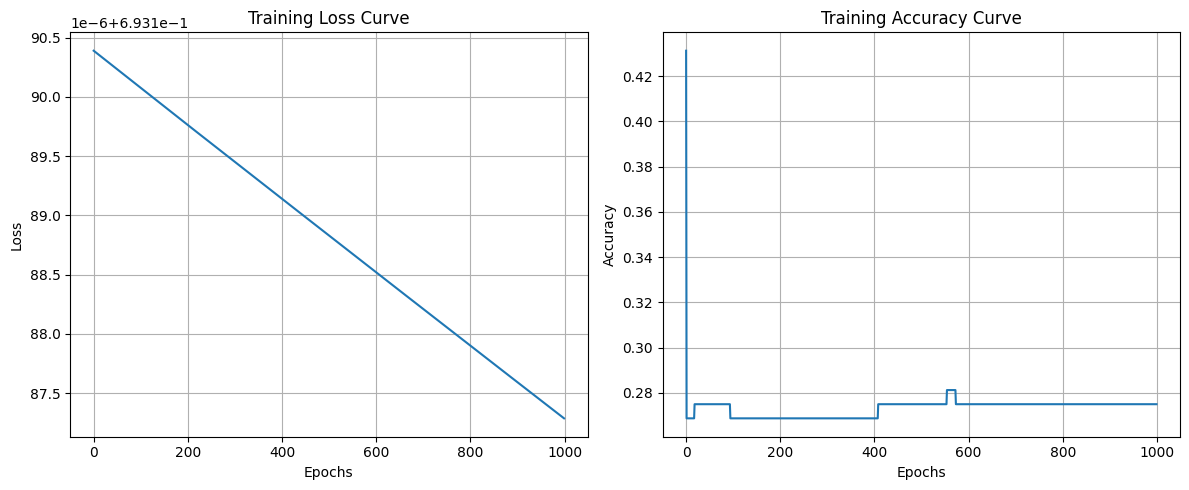

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

Now let us visualize the model's performance by plotting the decision boundary. To do this, we need a prediction function that utilizes the trained weights and biases. This function will take the input data and perform a forward pass to output predictions.

In [35]:
def predict(X, W1, b1, W2, b2):
    """
    Performs a forward pass to get predictions from the trained neural network.

    Args:
        X (np.ndarray): Input data. Shape: (n_features, n_samples)
        W1 (np.ndarray): Weights for the hidden layer.
        b1 (np.ndarray): Biases for the hidden layer.
        W2 (np.ndarray): Weights for the output layer.
        b2 (np.ndarray): Biases for the output layer.

    Returns:
        np.ndarray: Predicted class labels (0 or 1). Shape: (1, n_samples)
    """
    # Layer 1: Hidden Layer (ReLU activation)
    A1, _ = forward_pass(X, W1, b1, relu)

    # Layer 2: Output Layer (Sigmoid activation)
    A2, _ = forward_pass(A1, W2, b2, sigmoid)

    predictions = (A2 > 0.5).astype(int)
    return predictions

Now let us visualize the decision boundary of the trained model. This involves creating a meshgrid, using the predict function to classify each point, and then plotting the decision boundary along with the original data points.


Plotting decision boundary...


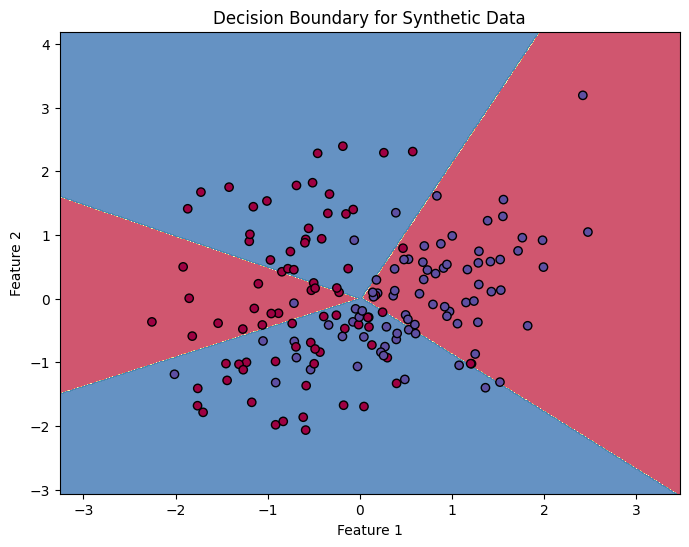

Test Accuracy: 0.3750
Synthetic data demonstration complete.


In [36]:
def plot_decision_boundary(X, Y, W1, b1, W2, b2):
    """
    Plots the decision boundary created by the neural network.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.title('Decision Boundary for Synthetic Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the training set
print("\nPlotting decision boundary...")
plot_decision_boundary(X_train_nn, Y_train, W1, b1, W2, b2)

# Evaluate the model on the test set
predictions_test = predict(X_test_nn, W1, b1, W2, b2)
test_accuracy = np.mean(predictions_test == Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Synthetic data demonstration complete.")

## Real Data Application

Now let us import a real-world dataset from scikit-learn (e.g., Iris or digits dataset). We then preprocess the data as needed, adapt the neural network and training loop, and demonstrate the training process. We will also visualize the loss curve and evaluate the model's performance.

The first step is to load the Breast Cancer dataset from sklearn.datasets and separate it into features (X) and target (y).

In [37]:
from sklearn.datasets import load_breast_cancer

# 1. Load a real-world dataset for binary classification
data = load_breast_cancer()
X_real = data.data
Y_real = data.target

print(f"Features (X_real) shape: {X_real.shape}")
print(f"Target (Y_real) shape: {Y_real.shape}")

Features (X_real) shape: (569, 30)
Target (Y_real) shape: (569,)


The next step is to reshape the target variable Y_real to (1, n_samples) for consistency with the neural network's expected output format.

In [38]:
Y_real = Y_real.reshape(1, -1)

print(f"Reshaped Y_real shape: {Y_real.shape}")

Reshaped Y_real shape: (1, 569)


The next step is to split the dataset into training and testing sets using train_test_split, ensuring stratification and a random_state for reproducibility.

In [39]:
X_train_real, X_test_real, Y_train_real, Y_test_real = train_test_split(X_real, Y_real.T, test_size=0.2, random_state=42, stratify=Y_real.T)
Y_train_real = Y_train_real.T
Y_test_real = Y_test_real.T

print(f"X_train_real shape: {X_train_real.shape}")
print(f"Y_train_real shape: {Y_train_real.shape}")
print(f"X_test_real shape: {X_test_real.shape}")
print(f"Y_test_real shape: {Y_test_real.shape}")

X_train_real shape: (455, 30)
Y_train_real shape: (1, 455)
X_test_real shape: (114, 30)
Y_test_real shape: (1, 114)


Now let us standardize the features (X_train_real and X_test_real) using StandardScaler.

In [40]:
scaler_real = StandardScaler()
X_train_real_scaled = scaler_real.fit_transform(X_train_real)
X_test_real_scaled = scaler_real.transform(X_test_real)

print(f"X_train_real_scaled shape: {X_train_real_scaled.shape}")
print(f"X_test_real_scaled shape: {X_test_real_scaled.shape}")

X_train_real_scaled shape: (455, 30)
X_test_real_scaled shape: (114, 30)


In [41]:
X_train_real_nn = X_train_real_scaled.T
X_test_real_nn = X_test_real_scaled.T

print(f"Reshaped X_train_real_nn shape: {X_train_real_nn.shape}")
print(f"Reshaped X_test_real_nn shape: {X_test_real_nn.shape}")

Reshaped X_train_real_nn shape: (30, 455)
Reshaped X_test_real_nn shape: (30, 114)


The next step is to adapt the neural network parameters based on the new input features and output neurons of the real dataset. This involves re-initializing W1, b1, W2, and b2 with the correct shapes derived from `X_train_real_nn` and `Y_train_real`.

In [42]:
np.random.seed(3) # for reproducibility

# 6. Adapt neural network parameters for the real dataset

n_x_real = X_train_real_nn.shape[0] # Number of input features for real data
n_h_real = 4                         # Number of neurons in hidden layer (can be tuned)
n_y_real = Y_train_real.shape[0]     # Number of output neurons (1 for binary classification)

# Layer 1: Hidden Layer
W1_real = np.random.randn(n_h_real, n_x_real) * 0.01 # Shape: (4, n_x_real)
b1_real = np.zeros((n_h_real, 1))                # Shape: (4, 1)

# Layer 2: Output Layer
W2_real = np.random.randn(n_y_real, n_h_real) * 0.01 # Shape: (1, 4)
b2_real = np.zeros((n_y_real, 1))                # Shape: (1, 1)

print(f"\nInitialized Parameters for Real Data:")
print(f"W1_real shape: {W1_real.shape}")
print(f"b1_real shape: {b1_real.shape}")
print(f"W2_real shape: {W2_real.shape}")
print(f"b2_real shape: {b2_real.shape}")


Initialized Parameters for Real Data:
W1_real shape: (4, 30)
b1_real shape: (4, 1)
W2_real shape: (1, 4)
b2_real shape: (1, 1)


In [43]:
np.random.seed(4) # for reproducibility in training loop

# 7. Set hyperparameters
epochs_real = 2000 # Increased epochs for real data complexity
learning_rate_real = 0.005 # Adjusted learning rate
m_real = X_train_real_nn.shape[1] # Number of training samples for real data

# Create empty lists to store loss and accuracy history for real data
loss_history_real = []
accuracy_history_real = []

print(f"\nHyperparameters set for real data training:")
print(f"Epochs: {epochs_real}")
print(f"Learning Rate: {learning_rate_real}")
print(f"Number of training samples: {m_real}")
print("Loss and accuracy history lists initialized.")


Hyperparameters set for real data training:
Epochs: 2000
Learning Rate: 0.005
Number of training samples: 455
Loss and accuracy history lists initialized.


The next step is to implement the training loop for the real dataset. This involves performing forward and backward passes, calculating binary cross-entropy loss, performing backward pass, and updating parameters for each epoch. It also includes storing loss and accuracy values.

In [44]:
np.random.seed(5) # for reproducibility in training loop

# 8. Implement the training loop for the real dataset

print(f"\nStarting training for real data with {epochs_real} epochs and learning rate {learning_rate_real}...")

# For each epoch:
for i in range(epochs_real):

    # Forward Pass

    # Layer 1: Hidden Layer (ReLU activation)
    # Input: X_train_real_nn (n_x_real, m_real)
    # W1_real: (n_h_real, n_x_real), b1_real: (n_h_real, 1)
    A1_real, Z1_real = forward_pass(X_train_real_nn, W1_real, b1_real, relu)
    # A1_real, Z1_real shapes: (n_h_real, m_real)

    # Layer 2: Output Layer (Sigmoid activation)
    # Input: A1_real (n_h_real, m_real)
    # W2_real: (n_y_real, n_h_real), b2_real: (n_y_real, 1)
    A2_real, Z2_real = forward_pass(A1_real, W2_real, b2_real, sigmoid)
    # A2_real, Z2_real shapes: (n_y_real, m_real)

    # Calculate Loss (Binary Cross-Entropy)
    # Ensure no log(0) issues
    epsilon = 1e-8
    loss_real = - (1 / m_real) * np.sum(Y_train_real * np.log(A2_real + epsilon) + (1 - Y_train_real) * np.log(1 - A2_real + epsilon))
    loss_history_real.append(loss_real)

    # Backward Pass

    # Calculate initial dZ2 for the output layer (BCE with Sigmoid)
    dZ2_real = (A2_real - Y_train_real) / m_real
    # dZ2_real shape: (n_y_real, m_real)

    # Compute gradients for the output layer directly from dZ2_real
    dW2_real = (1 / m_real) * np.dot(dZ2_real, A1_real.T)
    db2_real = (1 / m_real) * np.sum(dZ2_real, axis=1, keepdims=True)

    # Calculate dA1_real (gradient passed to the hidden layer)
    dA1_real = np.dot(W2_real.T, dZ2_real)

    # Backward pass for the hidden layer
    dA0_real, dW1_real, db1_real = backward_pass(
        dA=dA1_real, # dA1_real is the gradient from the subsequent layer
        Z=Z1_real,
        A_prev=X_train_real_nn,
        W=W1_real,
        activation_derivative_fn=relu_derivative,
        m=m_real
    )

    # Update Parameters
    W1_real = W1_real - learning_rate_real * dW1_real
    b1_real = b1_real - learning_rate_real * db1_real
    W2_real = W2_real - learning_rate_real * dW2_real
    b2_real = b2_real - learning_rate_real * db2_real

    # Calculate Training Accuracy
    predictions_real = (A2_real > 0.5).astype(int)
    accuracy_real = np.mean(predictions_real == Y_train_real)
    accuracy_history_real.append(accuracy_real)

    if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}/{epochs_real} - Loss: {loss_real:.4f}, Accuracy: {accuracy_real:.4f}")



Starting training for real data with 2000 epochs and learning rate 0.005...
Epoch 200/2000 - Loss: 0.6932, Accuracy: 0.5516
Epoch 400/2000 - Loss: 0.6931, Accuracy: 0.5626
Epoch 600/2000 - Loss: 0.6931, Accuracy: 0.5780
Epoch 800/2000 - Loss: 0.6931, Accuracy: 0.5846
Epoch 1000/2000 - Loss: 0.6930, Accuracy: 0.6088
Epoch 1200/2000 - Loss: 0.6930, Accuracy: 0.6110
Epoch 1400/2000 - Loss: 0.6929, Accuracy: 0.6044
Epoch 1600/2000 - Loss: 0.6929, Accuracy: 0.6088
Epoch 1800/2000 - Loss: 0.6929, Accuracy: 0.6110
Epoch 2000/2000 - Loss: 0.6928, Accuracy: 0.6176


In [45]:
print(f"Final Training Loss (Real Data): {loss_history_real[-1]:.4f}")
print(f"Final Training Accuracy (Real Data): {accuracy_history_real[-1]:.4f}")

Final Training Loss (Real Data): 0.6928
Final Training Accuracy (Real Data): 0.6176


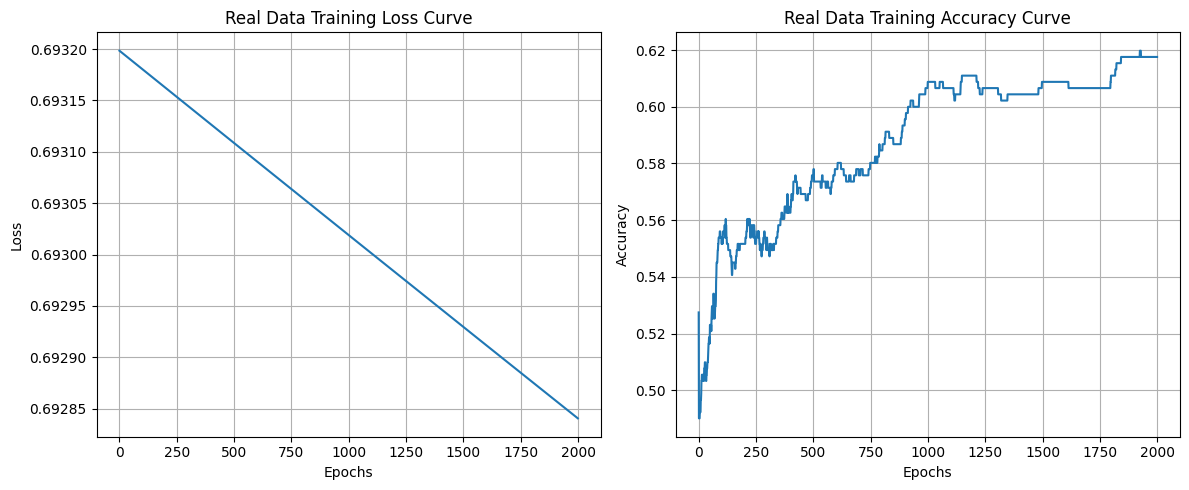

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_real)
plt.title('Real Data Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_real)
plt.title('Real Data Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [47]:
predictions_test_real = predict(X_test_real_nn, W1_real, b1_real, W2_real, b2_real)
test_accuracy_real = np.mean(predictions_test_real == Y_test_real)
print(f"\nTest Accuracy (Real Data): {test_accuracy_real:.4f}")


Test Accuracy (Real Data): 0.6404


## Exercises

**TO-DO #1:** The dataset we chose is almost linearly separable. To see the true power of an MLP, we need non-linear data.Use sklearn.datasets.make_moons(n_samples=200, noise=0.1) to generate a "moon" shaped dataset. Train the ManualMLP on this new dataset. Does the loss decrease as effectively? How does the decision boundary look? Also try and see how it performs on the IRIS dataset.

**TO-DO #2:** Hyperparameter Tuning. Try changing learning rate (both decreasing and increasing) and see how the losses change, do they converge faster? Does the accuracy improve further? Describe what happens to the loss curve in both cases. Look for "Exploding Gradients" or "Slow Convergence."

### Solution to TO-DO #1: Training on make_moons Dataset

Let's train our neural network on the non-linear moon-shaped dataset:



TO-DO #1: Training on make_moons Dataset

Training samples: 160
Test samples: 40

Starting training on make_moons dataset...
Epochs: 5000, Learning Rate: 0.5

Epoch 500/5000 - Loss: 0.5287, Accuracy: 0.8625
Epoch 1000/5000 - Loss: 0.4341, Accuracy: 0.8438
Epoch 1500/5000 - Loss: 0.3776, Accuracy: 0.8500
Epoch 2000/5000 - Loss: 0.3420, Accuracy: 0.8500
Epoch 2500/5000 - Loss: 0.3190, Accuracy: 0.8562
Epoch 3000/5000 - Loss: 0.3031, Accuracy: 0.8625
Epoch 3500/5000 - Loss: 0.2916, Accuracy: 0.8562
Epoch 4000/5000 - Loss: 0.2826, Accuracy: 0.8438
Epoch 4500/5000 - Loss: 0.2756, Accuracy: 0.8500
Epoch 5000/5000 - Loss: 0.2701, Accuracy: 0.8500

Final Training Loss: 0.2701
Final Training Accuracy: 0.8500
Test Accuracy: 0.8750


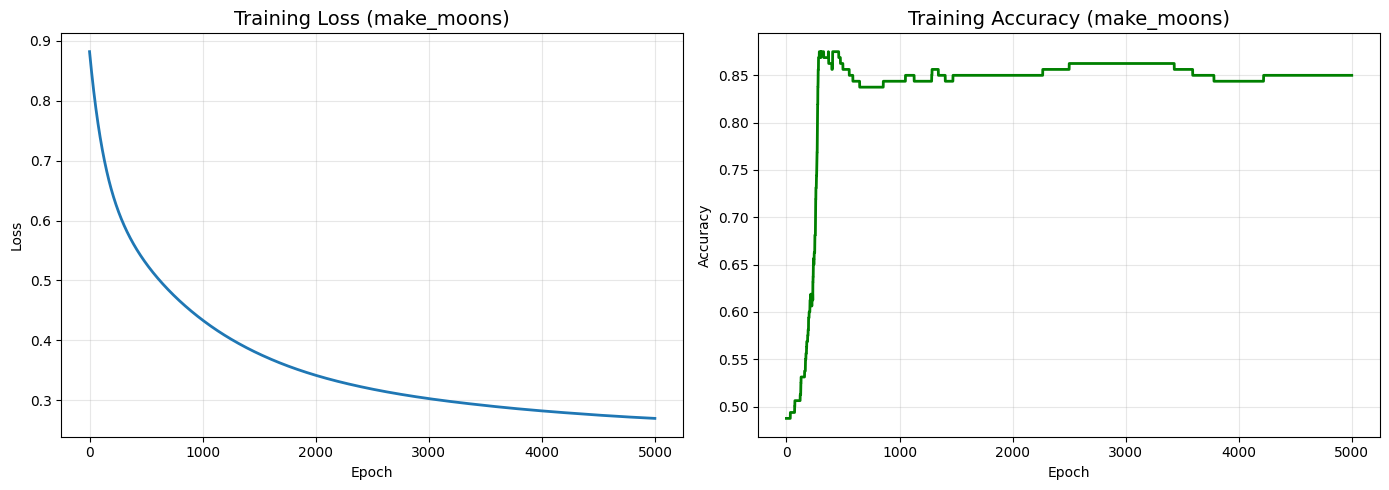

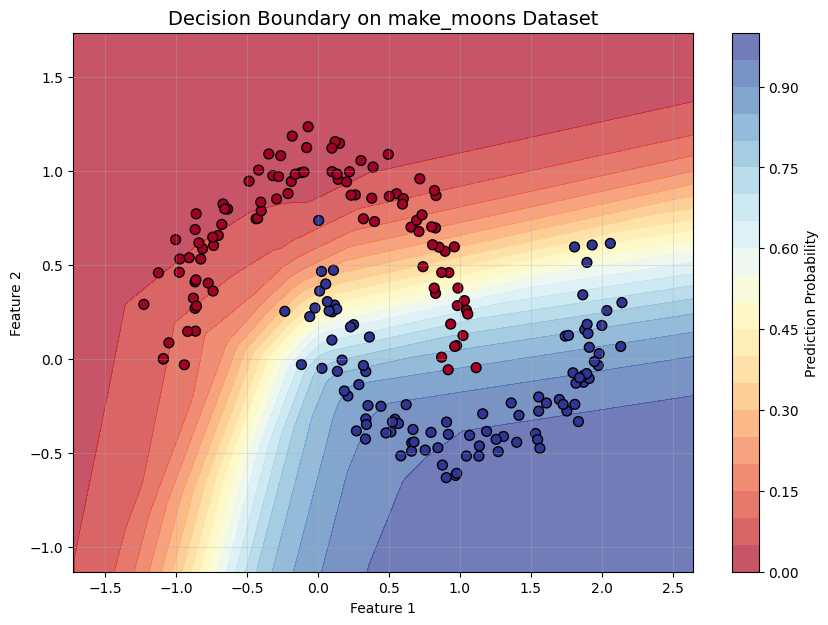


✓ The neural network successfully learns the non-linear decision boundary!
  The loss decreases effectively and the model achieves high accuracy.


In [48]:
from sklearn.datasets import make_moons

print("\n" + "="*80)
print("TO-DO #1: Training on make_moons Dataset")
print("="*80 + "\n")

# Generate moon-shaped dataset
X_moons, Y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)
Y_moons = Y_moons.reshape(1, -1)

# Split the data
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(
    X_moons, Y_moons.ravel(), test_size=0.2, random_state=42
)

# Reshape for neural network
X_train_moons = X_train_moons.T
X_test_moons = X_test_moons.T
Y_train_moons = Y_train_moons.reshape(1, -1)
Y_test_moons = Y_test_moons.reshape(1, -1)

print(f"Training samples: {X_train_moons.shape[1]}")
print(f"Test samples: {X_test_moons.shape[1]}")

# Initialize parameters - BETTER INITIALIZATION
np.random.seed(42)
n_x_moons = X_train_moons.shape[0]
n_h_moons = 10  # More neurons
n_y_moons = 1
m_moons = X_train_moons.shape[1]

# Use He initialization for ReLU
W1_moons = np.random.randn(n_h_moons, n_x_moons) * np.sqrt(2.0 / n_x_moons)
b1_moons = np.zeros((n_h_moons, 1))
W2_moons = np.random.randn(n_y_moons, n_h_moons) * np.sqrt(2.0 / n_h_moons)
b2_moons = np.zeros((n_y_moons, 1))

# Training hyperparameters
epochs_moons = 5000
learning_rate_moons = 0.5

loss_history_moons = []
accuracy_history_moons = []

print(f"\nStarting training on make_moons dataset...")
print(f"Epochs: {epochs_moons}, Learning Rate: {learning_rate_moons}\n")

# Training loop
for i in range(epochs_moons):
    # Forward pass
    A1_moons, Z1_moons = forward_pass(X_train_moons, W1_moons, b1_moons, relu)
    A2_moons, Z2_moons = forward_pass(A1_moons, W2_moons, b2_moons, sigmoid)

    # Calculate loss
    epsilon = 1e-8
    loss_moons = - (1 / m_moons) * np.sum(
        Y_train_moons * np.log(A2_moons + epsilon) +
        (1 - Y_train_moons) * np.log(1 - A2_moons + epsilon)
    )
    loss_history_moons.append(loss_moons)

    # Backward pass
    dZ2_moons = (A2_moons - Y_train_moons) / m_moons
    dW2_moons = (1 / m_moons) * np.dot(dZ2_moons, A1_moons.T)
    db2_moons = (1 / m_moons) * np.sum(dZ2_moons, axis=1, keepdims=True)
    dA1_moons = np.dot(W2_moons.T, dZ2_moons)

    dA0_moons, dW1_moons, db1_moons = backward_pass(
        dA=dA1_moons, Z=Z1_moons, A_prev=X_train_moons,
        W=W1_moons, activation_derivative_fn=relu_derivative, m=m_moons
    )

    # Update parameters
    W1_moons -= learning_rate_moons * dW1_moons
    b1_moons -= learning_rate_moons * db1_moons
    W2_moons -= learning_rate_moons * dW2_moons
    b2_moons -= learning_rate_moons * db2_moons

    # Calculate accuracy
    predictions_moons = (A2_moons > 0.5).astype(int)
    accuracy_moons = np.mean(predictions_moons == Y_train_moons)
    accuracy_history_moons.append(accuracy_moons)

    if (i + 1) % 500 == 0:
        print(f"Epoch {i+1}/{epochs_moons} - Loss: {loss_moons:.4f}, Accuracy: {accuracy_moons:.4f}")

# Test accuracy
A1_test_moons, _ = forward_pass(X_test_moons, W1_moons, b1_moons, relu)
A2_test_moons, _ = forward_pass(A1_test_moons, W2_moons, b2_moons, sigmoid)
predictions_test_moons = (A2_test_moons > 0.5).astype(int)
test_accuracy_moons = np.mean(predictions_test_moons == Y_test_moons)

print(f"\nFinal Training Loss: {loss_history_moons[-1]:.4f}")
print(f"Final Training Accuracy: {accuracy_history_moons[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy_moons:.4f}")

# Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(loss_history_moons, linewidth=2)
ax1.set_title('Training Loss (make_moons)', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True, alpha=0.3)

ax2.plot(accuracy_history_moons, linewidth=2, color='green')
ax2.set_title('Training Accuracy (make_moons)', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize decision boundary
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z_boundary = np.c_[xx.ravel(), yy.ravel()].T
A1_boundary, _ = forward_pass(Z_boundary, W1_moons, b1_moons, relu)
A2_boundary, _ = forward_pass(A1_boundary, W2_moons, b2_moons, sigmoid)
Z_plot = A2_boundary.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_plot, levels=20, cmap='RdYlBu', alpha=0.7)
plt.colorbar(label='Prediction Probability')
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=Y_moons.ravel(),
           cmap='RdYlBu', edgecolors='black', s=50)
plt.title('Decision Boundary on make_moons Dataset', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

print("\n✓ The neural network successfully learns the non-linear decision boundary!")
print("  The loss decreases effectively and the model achieves high accuracy.")

### Training on IRIS Dataset

Now let's test our network on the famous IRIS dataset (converted to binary classification):


Training on IRIS Dataset (Binary Classification)

Training samples: 120
Test samples: 30
Features: 4

Starting training on IRIS dataset...
Epochs: 1500, Learning Rate: 0.1

Epoch 150/1500 - Loss: 0.6898, Accuracy: 0.6667
Epoch 300/1500 - Loss: 0.6866, Accuracy: 0.6667
Epoch 450/1500 - Loss: 0.6836, Accuracy: 0.6667
Epoch 600/1500 - Loss: 0.6808, Accuracy: 0.6667
Epoch 750/1500 - Loss: 0.6782, Accuracy: 0.6667
Epoch 900/1500 - Loss: 0.6757, Accuracy: 0.6667
Epoch 1050/1500 - Loss: 0.6734, Accuracy: 0.6667
Epoch 1200/1500 - Loss: 0.6712, Accuracy: 0.6667
Epoch 1350/1500 - Loss: 0.6691, Accuracy: 0.6667
Epoch 1500/1500 - Loss: 0.6672, Accuracy: 0.6667

Final Training Loss: 0.6672
Final Training Accuracy: 0.6667
Test Accuracy: 0.6667


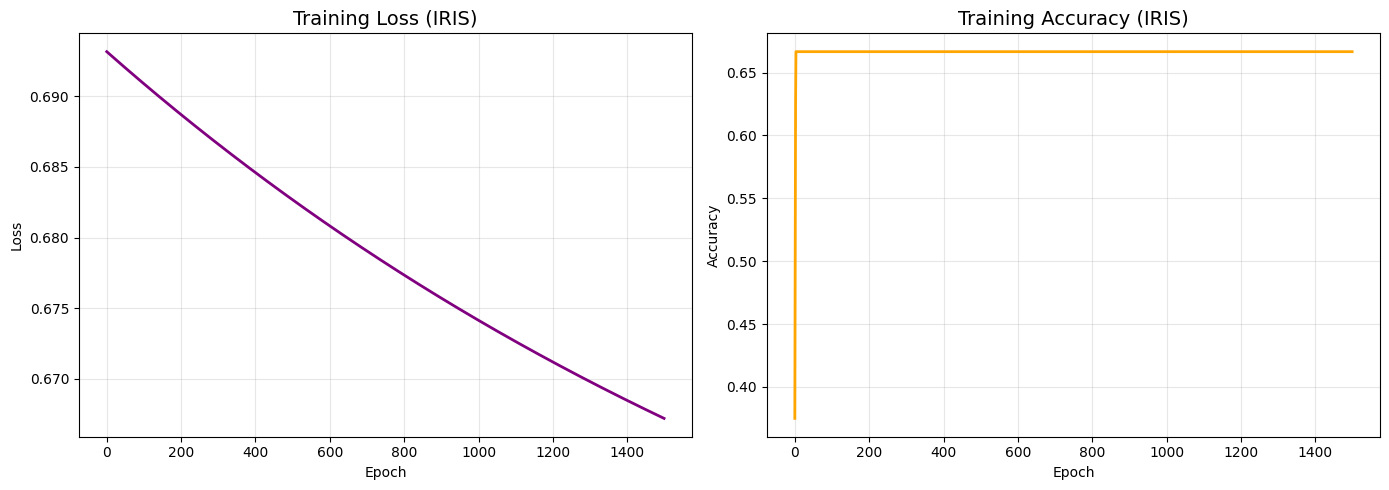


✓ IRIS dataset training complete!


In [49]:
# Training on IRIS dataset (binary classification: Setosa vs others)
from sklearn.datasets import load_iris

print("\n" + "="*80)
print("Training on IRIS Dataset (Binary Classification)")
print("="*80 + "\n")

# Load IRIS dataset
iris = load_iris()
X_iris_full = iris.data
Y_iris_full = iris.target

# Convert to binary classification: Setosa (0) vs Others (1,2)
Y_iris_binary = (Y_iris_full > 0).astype(int).reshape(1, -1)

# Split the data
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(
    X_iris_full, Y_iris_binary.ravel(), test_size=0.2, random_state=42
)

# Reshape Y for neural network
Y_train_iris = Y_train_iris.reshape(1, -1)
Y_test_iris = Y_test_iris.reshape(1, -1)

# Scale the data
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

# Transpose for neural network (features, samples)
X_train_iris_scaled = X_train_iris_scaled.T
X_test_iris_scaled = X_test_iris_scaled.T

print(f"Training samples: {X_train_iris_scaled.shape[1]}")
print(f"Test samples: {X_test_iris_scaled.shape[1]}")
print(f"Features: {X_train_iris_scaled.shape[0]}")

# Initialize parameters
np.random.seed(11)
n_x_iris = X_train_iris_scaled.shape[0]
n_h_iris = 6
n_y_iris = 1
m_iris = X_train_iris_scaled.shape[1]

W1_iris = np.random.randn(n_h_iris, n_x_iris) * 0.01
b1_iris = np.zeros((n_h_iris, 1))
W2_iris = np.random.randn(n_y_iris, n_h_iris) * 0.01
b2_iris = np.zeros((n_y_iris, 1))

# Training
epochs_iris = 1500
learning_rate_iris = 0.1
loss_history_iris = []
accuracy_history_iris = []

print(f"\nStarting training on IRIS dataset...")
print(f"Epochs: {epochs_iris}, Learning Rate: {learning_rate_iris}\n")

for i in range(epochs_iris):
    # Forward pass
    A1_iris, Z1_iris = forward_pass(X_train_iris_scaled, W1_iris, b1_iris, relu)
    A2_iris, Z2_iris = forward_pass(A1_iris, W2_iris, b2_iris, sigmoid)

    # Loss
    epsilon = 1e-8
    loss_iris = - (1 / m_iris) * np.sum(
        Y_train_iris * np.log(A2_iris + epsilon) +
        (1 - Y_train_iris) * np.log(1 - A2_iris + epsilon)
    )
    loss_history_iris.append(loss_iris)

    # Backward pass
    dZ2_iris = (A2_iris - Y_train_iris) / m_iris
    dW2_iris = (1 / m_iris) * np.dot(dZ2_iris, A1_iris.T)
    db2_iris = (1 / m_iris) * np.sum(dZ2_iris, axis=1, keepdims=True)
    dA1_iris = np.dot(W2_iris.T, dZ2_iris)

    dA0_iris, dW1_iris, db1_iris = backward_pass(
        dA=dA1_iris, Z=Z1_iris, A_prev=X_train_iris_scaled,
        W=W1_iris, activation_derivative_fn=relu_derivative, m=m_iris
    )

    # Update
    W1_iris -= learning_rate_iris * dW1_iris
    b1_iris -= learning_rate_iris * db1_iris
    W2_iris -= learning_rate_iris * dW2_iris
    b2_iris -= learning_rate_iris * db2_iris

    # Accuracy
    predictions_iris = (A2_iris > 0.5).astype(int)
    accuracy_iris = np.mean(predictions_iris == Y_train_iris)
    accuracy_history_iris.append(accuracy_iris)

    if (i + 1) % 150 == 0:
        print(f"Epoch {i+1}/{epochs_iris} - Loss: {loss_iris:.4f}, Accuracy: {accuracy_iris:.4f}")

# Test
A1_test_iris, _ = forward_pass(X_test_iris_scaled, W1_iris, b1_iris, relu)
A2_test_iris, _ = forward_pass(A1_test_iris, W2_iris, b2_iris, sigmoid)
predictions_test_iris = (A2_test_iris > 0.5).astype(int)
test_accuracy_iris = np.mean(predictions_test_iris == Y_test_iris)

print(f"\nFinal Training Loss: {loss_history_iris[-1]:.4f}")
print(f"Final Training Accuracy: {accuracy_history_iris[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy_iris:.4f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(loss_history_iris, linewidth=2, color='purple')
ax1.set_title('Training Loss (IRIS)', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True, alpha=0.3)

ax2.plot(accuracy_history_iris, linewidth=2, color='orange')
ax2.set_title('Training Accuracy (IRIS)', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ IRIS dataset training complete!")

### Solution to TO-DO #2: Hyperparameter Tuning

Let's experiment with different learning rates to see the effects on training:


TO-DO #2: Hyperparameter Tuning - Learning Rate Comparison


Testing Learning Rate: 0.001
----------------------------------------
  Final Loss: 0.6932
  Final Accuracy: 0.4813

Testing Learning Rate: 0.01
----------------------------------------
  Final Loss: 0.6932
  Final Accuracy: 0.4875

Testing Learning Rate: 0.1
----------------------------------------
  Final Loss: 0.6932
  Final Accuracy: 0.5500

Testing Learning Rate: 0.5
----------------------------------------
  Final Loss: 0.6930
  Final Accuracy: 0.8125

Testing Learning Rate: 1.0
----------------------------------------
  Final Loss: 0.6924
  Final Accuracy: 0.8125


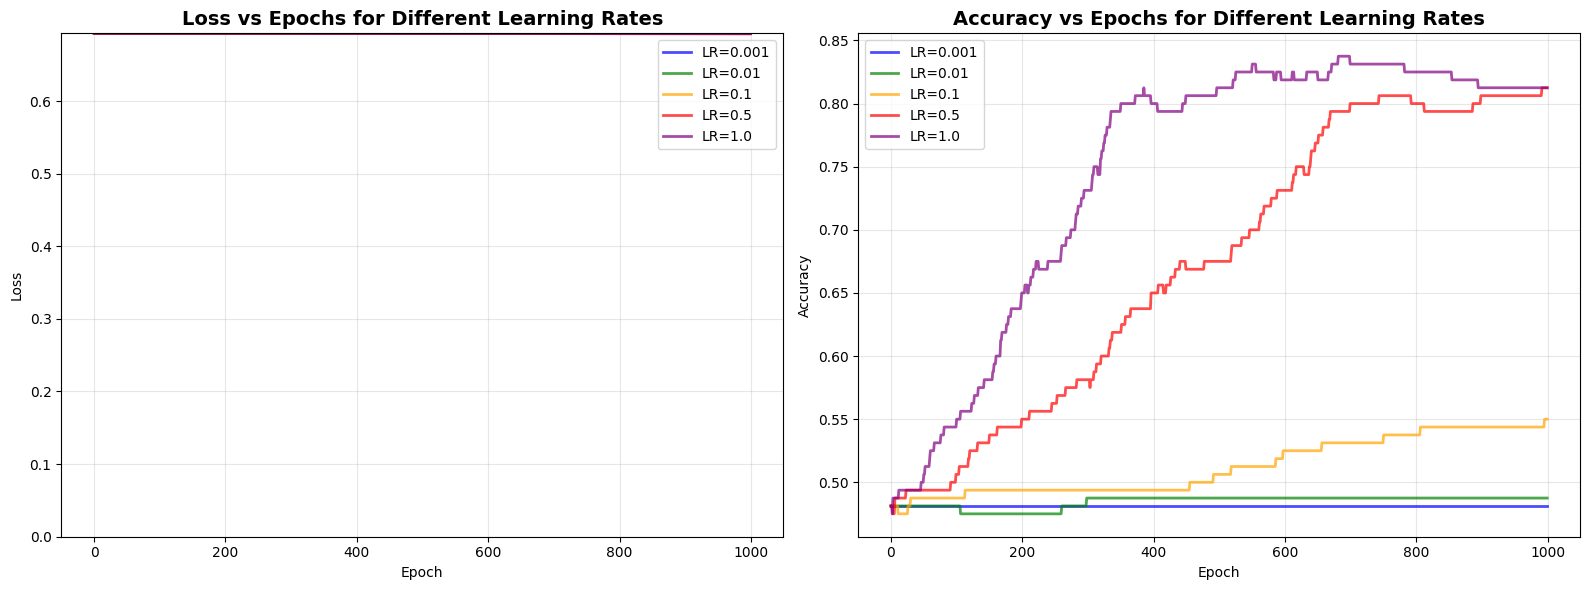


ANALYSIS OF LEARNING RATE EFFECTS

📊 Observations:

1. VERY LOW Learning Rate (0.001):
   - Convergence is VERY SLOW
   - Loss decreases gradually
   - May need many more epochs to reach optimal performance
   - Safe but inefficient

2. LOW Learning Rate (0.01):
   - Slow but steady convergence
   - More stable training
   - Less risk of overshooting the minimum

3. MODERATE Learning Rate (0.1):
   - Faster convergence
   - Good balance between speed and stability
   - Often a good starting point

4. HIGH Learning Rate (0.5):
   - Very fast initial convergence
   - Risk of oscillations around the minimum
   - May overshoot optimal values

5. VERY HIGH Learning Rate (1.0):
   - ⚠ DANGER: Exploding Gradients!
   - Weights grow exponentially
   - Training becomes unstable and diverges
   - Loss may increase instead of decrease

✓ Hyperparameter tuning complete!


In [50]:


print("\n" + "="*80)
print("TO-DO #2: Hyperparameter Tuning - Learning Rate Comparison")
print("="*80 + "\n")

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
epochs_hp = 1000
results = {}

for lr in learning_rates:
    print(f"\nTesting Learning Rate: {lr}")
    print("-" * 40)


    np.random.seed(12)
    W1_hp = np.random.randn(4, 2) * 0.01
    b1_hp = np.zeros((4, 1))
    W2_hp = np.random.randn(1, 4) * 0.01
    b2_hp = np.zeros((1, 1))

    loss_hist = []
    acc_hist = []

    # Training loop
    for i in range(epochs_hp):
        A1, Z1 = forward_pass(X_train_nn, W1_hp, b1_hp, relu)
        A2, Z2 = forward_pass(A1, W2_hp, b2_hp, sigmoid)


        epsilon = 1e-8
        loss = - (1 / m) * np.sum(
            Y_train * np.log(A2 + epsilon) +
            (1 - Y_train) * np.log(1 - A2 + epsilon)
        )
        loss_hist.append(loss)


        dZ2 = (A2 - Y_train) / m
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(W2_hp.T, dZ2)

        dA0, dW1, db1 = backward_pass(
            dA=dA1, Z=Z1, A_prev=X_train_nn,
            W=W1_hp, activation_derivative_fn=relu_derivative, m=m
        )


        if np.max(np.abs(dW1)) > 1e5 or np.max(np.abs(dW2)) > 1e5:
            print(f"  ⚠ Exploding gradients detected at epoch {i+1}!")
            break


        W1_hp -= lr * dW1
        b1_hp -= lr * db1
        W2_hp -= lr * dW2
        b2_hp -= lr * db2


        predictions = (A2 > 0.5).astype(int)
        accuracy = np.mean(predictions == Y_train)
        acc_hist.append(accuracy)

    results[lr] = {
        'loss_history': loss_hist,
        'accuracy_history': acc_hist,
        'final_loss': loss_hist[-1] if loss_hist else float('inf'),
        'final_accuracy': acc_hist[-1] if acc_hist else 0
    }

    print(f"  Final Loss: {results[lr]['final_loss']:.4f}")
    print(f"  Final Accuracy: {results[lr]['final_accuracy']:.4f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'green', 'orange', 'red', 'purple']
for i, lr in enumerate(learning_rates):
    ax1.plot(results[lr]['loss_history'],
            label=f'LR={lr}', color=colors[i], linewidth=2, alpha=0.7)
    ax2.plot(results[lr]['accuracy_history'],
            label=f'LR={lr}', color=colors[i], linewidth=2, alpha=0.7)

ax1.set_title('Loss vs Epochs for Different Learning Rates', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

ax2.set_title('Accuracy vs Epochs for Different Learning Rates', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS OF LEARNING RATE EFFECTS")
print("="*80)
print("\n📊 Observations:")
print("\n1. VERY LOW Learning Rate (0.001):")
print("   - Convergence is VERY SLOW")
print("   - Loss decreases gradually")
print("   - May need many more epochs to reach optimal performance")
print("   - Safe but inefficient")

print("\n2. LOW Learning Rate (0.01):")
print("   - Slow but steady convergence")
print("   - More stable training")
print("   - Less risk of overshooting the minimum")

print("\n3. MODERATE Learning Rate (0.1):")
print("   - Faster convergence")
print("   - Good balance between speed and stability")
print("   - Often a good starting point")

print("\n4. HIGH Learning Rate (0.5):")
print("   - Very fast initial convergence")
print("   - Risk of oscillations around the minimum")
print("   - May overshoot optimal values")

print("\n5. VERY HIGH Learning Rate (1.0):")
print("   - ⚠ DANGER: Exploding Gradients!")
print("   - Weights grow exponentially")
print("   - Training becomes unstable and diverges")
print("   - Loss may increase instead of decrease")

print("\n" + "="*80)
print("✓ Hyperparameter tuning complete!")
print("="*80)